##             **Decision Tree**    
#### A decision tree is a flowchart-like tree structure that represents a set of decisions and the possible outcomes of those decisions. It is a graphical representation of possible solutions to a decision based on certain conditions. Each branch of the tree represents a possible decision, and the leaf nodes represent the end result of a series of decisions. The decision tree allows you to effectively consider all possible solutions to a problem, and helps you make a decision based on the available information.

####   Basic Part of Tree :
    Root
    Child Node
    Leaf Node
    Parent Node
    Ancestor
    Descendants
    
#### The Depth of a Tree: 
     It is a measure of the distance from the root of the tree to its deepest leaf node. In other words, it is the number of
     edges between the root node and the farthest leaf node.
#### Entropy:
    Entropy is a measure of how impure or uncertain a given node is. It is calculated based on the probabilities of the 
    different classes or labels that are present in the node. A node with a high entropy is one where there is a higher 
    probability that the samples in the node belong to multiple different classes, whereas a node with low entropy is one 
    where the samples are more likely to all belong to the same class.
    
    Entropy = -∑(p_i * log_2(p_i))

In [44]:
# import pandas as pd
import seaborn as sns
from sklearn import tree
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('game data.csv')

In [22]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [23]:
print('Check Null Values')
df.isnull().sum()

Check Null Values


Days            0
Outlook         0
Temprature      0
Routine         0
Wear Jacket?    0
dtype: int64

In [24]:
df = df.drop('Days', axis=1)

In [25]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [26]:
x = df.drop('Wear Jacket?', axis=1)
y = df[['Wear Jacket?']]

In [27]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [28]:
y.head()

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes


In [30]:
le = LabelEncoder()

In [31]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    x[col]=le.fit_transform(x[col])

In [32]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [33]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [34]:
#Outlook -> Sunny, Cloudy = (1, 0)
#Temperature -> Cold, Warm = (0, 1)
#Routine -> Indoor, Outdoor = (0, 1)

In [36]:
dt = DecisionTreeClassifier()

In [37]:
dt.fit(x,y) # training decison tree model

DecisionTreeClassifier()

In [45]:
x.Temprature.unique()

array([0, 1])

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

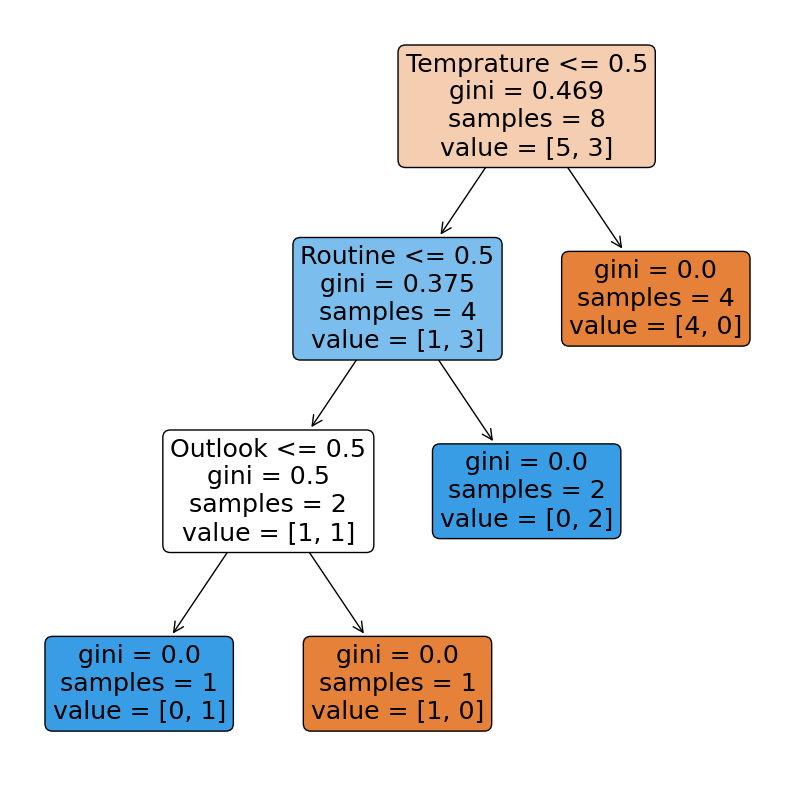

In [46]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt, filled=True, rounded=True, feature_names=x.columns)

In [47]:
dt.predict([[1,0,0]]) #  Sunny, Cold , Indoor= ??

array(['No'], dtype=object)